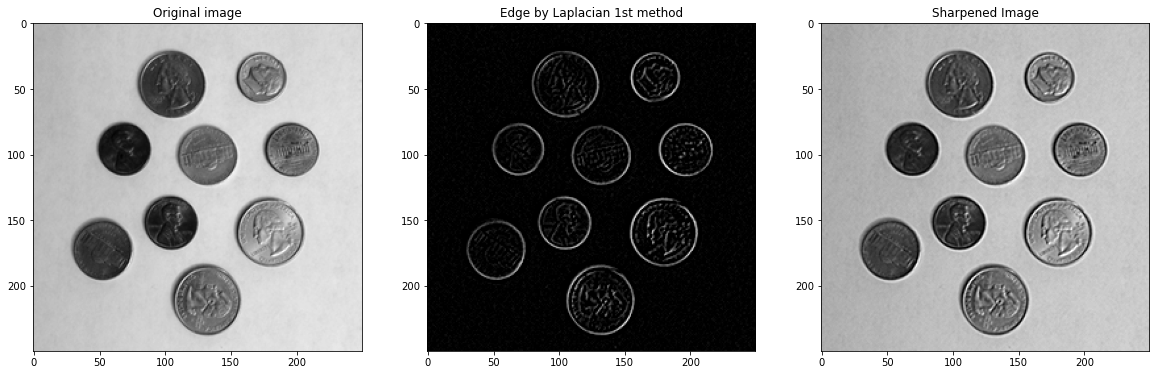

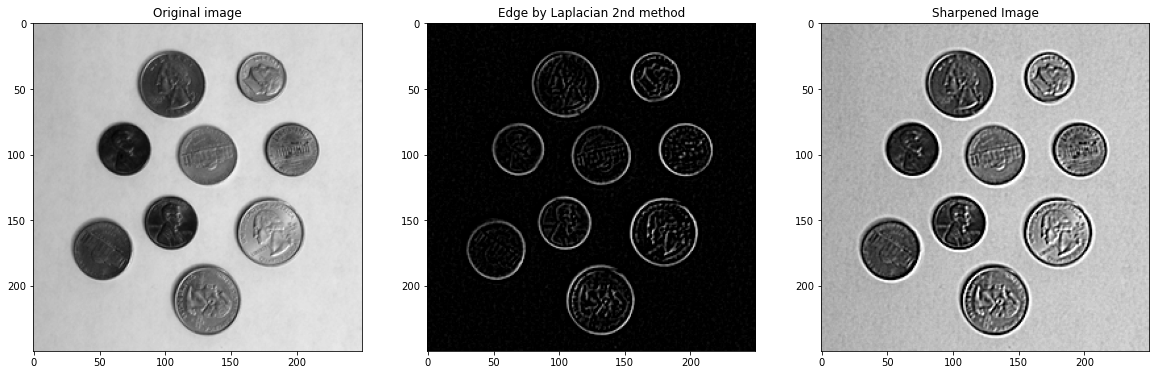

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

#Create path and read image
path = r'../images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Convert to grayscale map
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Run Gaussian blur to delete low frequencies noise
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

#Laplacian operator 1st method (used only OpenCV)
ImgLap1 = cv2.Laplacian(blurred, cv2.CV_64F, 3)
sharp = np.float64(gray) #Convert image to data type floating 64bit
ImgResult1 = sharp - ImgLap1
ImgLap1 = np.clip(ImgLap1, 0, 255)
ImgResult1 = np.clip(ImgResult1, 0, 255)
ImgLap1 = np.uint8(np.absolute(ImgLap1))
ImgResult1 = np.uint8(np.absolute(ImgResult1))
#ImgLap1 = cv2.convertScaleAbs(ImgLap1)
#ImgResult1 = cv2.convertScaleAbs(ImgResult1)

#Plot the first method
fig1 = plt.figure(figsize=(20, 14)) #create figure
fig1.tight_layout(pad=3)
#Ax1
ax1 = fig1.add_subplot(1, 3, 1)
ax1.set_title("Original image")
ax1.imshow(gray, cmap='gray')
#Ax2
ax2 = fig1.add_subplot(1, 3, 2)
ax2.set_title("Edge by Laplacian 1st method")
ax2.imshow(ImgLap1, cmap='gray')
#Ax3
ax3 = fig1.add_subplot(1, 3, 3)
ax3.set_title("Sharpened Image")
ax3.imshow(ImgResult1, cmap='gray')

#Laplacian operator 2nd method (used numpy and opencv)
kernel1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float64)
kernel2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float64)
ImgLap2 = cv2.filter2D(blurred, cv2.CV_64F, kernel2) #Convoluted with Laplacian kernel
ImgResult2 = sharp - ImgLap2 #Sharpen image
ImgLap2 = np.clip(ImgLap2, 0, 255) #clip image to rage 255
ImgResult2 = np.clip(ImgResult2, 0, 255) #clip image to rage 255
ImgLap2 = np.uint8(np.absolute(ImgLap2)) #transform to unsign integer 8 bit
ImgResult2 = np.uint8(np.absolute(ImgResult2)) #transform to unsign integer 8 bit

#Plot the first method
fig1 = plt.figure(figsize=(20, 14)) #create figure
fig1.tight_layout(pad=3)
#Ax1
ax1 = fig1.add_subplot(1, 3, 1)
ax1.set_title("Original image")
ax1.imshow(gray, cmap='gray')
#Ax2
ax2 = fig1.add_subplot(1, 3, 2)
ax2.set_title("Edge by Laplacian 2nd method")
ax2.imshow(ImgLap2, cmap='gray')
#Ax3
ax3 = fig1.add_subplot(1, 3, 3)
ax3.set_title("Sharpened Image")
ax3.imshow(ImgResult2, cmap='gray')